In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import scale, normalize
from sklearn.preprocessing import Imputer
from sklearn import metrics
import matplotlib.pyplot as plt
import random

In [2]:
X = np.array([1,2,3])
Y = X
print scale(Y)
Y = X.reshape(1,-1)
print normalize(Y)

[-1.22474487  0.          1.22474487]
[[ 0.26726124  0.53452248  0.80178373]]


/Users/Rohan/Downloads/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
/Users/Rohan/Downloads/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


## Reading the data

In [3]:
train_data = pd.read_csv('kaggle_train.csv')

bot_data = pd.read_csv('bots_data.csv')
nonbot_data = pd.read_csv('nonbots_data.csv')
test_data = pd.read_csv('test.csv')

## Cleaning the data

In [4]:
train_attr = train_data[
  ['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']]
train_label = train_data[['bot']]

In [5]:
bot_attr = bot_data[
  ['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']]
bot_label = bot_data[['bot']]

nonbot_attr = nonbot_data[
  ['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']]
nonbot_label = nonbot_data[['bot']]

test_attr = test_data[
  ['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'verified']]
test_label = test_data[['bot']]

### Normalizing the data

In [6]:
train_attr = normalize(train_attr)
test_attr = normalize(test_attr)
bot_attr = normalize(bot_attr)
nonbot_attr = normalize(nonbot_attr)

## Training the classifier

In [7]:
nb = GaussianNB().fit(train_attr, train_label.as_matrix())

/Users/Rohan/Downloads/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Testing on test data

In [8]:
actual = np.array(test_label)
predicted = nb.predict(test_attr)
pred = np.array(predicted)

In [9]:
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
auc = roc_auc_score(actual, pred)
print 'Accuracy is {:.4f}%\n\
Precision is {:.4f}%\n\
Recall is {:.4f}%\n\
F1 Score is {:.4f}\n\
Area Under Curve is {:.4f}'.format(accuracy, precision, recall, f1, auc)

Accuracy is 88.0000%
Precision is 95.2381%
Recall is 80.0000%
F1 Score is 0.8696
Area Under Curve is 0.8800


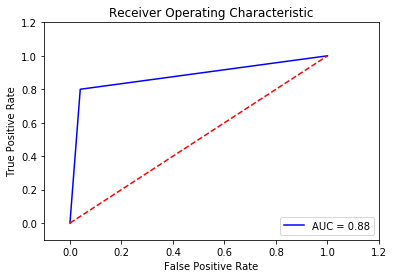

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Testing on bot data

In [11]:
actual = np.array(bot_label)
predicted = nb.predict(bot_attr)
pred = np.array(predicted)

In [12]:
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print 'Accuracy is {:.4f}%\n\
Precision is {:.4f}%\n\
Recall is {:.4f}%\n\
F1 Score is {:.4f}'.format(accuracy, precision, recall, f1)

Accuracy is 90.7197%
Precision is 100.0000%
Recall is 90.7197%
F1 Score is 0.9513


## Testing on non-bot data

In [13]:
actual = np.array(nonbot_label)
predicted = nb.predict(nonbot_attr)
pred = np.array(predicted)

In [14]:
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
print 'Accuracy is {:.4f}%\n\
Precision is {:.4f}%\n\
Recall is {:.4f}%\n\
F1 Score is {:.4f}'.format(accuracy, precision, recall, f1)

Accuracy is 60.5442%
Precision is 0.0000%
Recall is 0.0000%
F1 Score is 0.0000


/Users/Rohan/Downloads/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/Rohan/Downloads/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


## Cross-validation on training set

## Train-Test split

In [16]:
train_X, test_X, train_Y, test_Y = train_test_split(train_attr, train_label, test_size=0.4, random_state=0)

nb = GaussianNB().fit(train_X, train_Y)

actual = np.array(test_Y)
predicted = nb.predict(test_X)
pred = np.array(predicted)

accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
auc = roc_auc_score(actual, pred)
print 'Accuracy is {:.4f}%\n\
Precision is {:.4f}%\n\
Recall is {:.4f}%\n\
F1 Score is {:.4f}\n\
Area Under Curve is {:.4f}'.format(accuracy, precision, recall, f1, auc)

Accuracy is 75.1564%
Precision is 68.4573%
Recall is 91.0256%
F1 Score is 0.7814
Area Under Curve is 0.7553


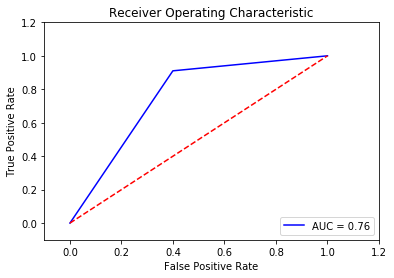

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## K-Folds

In [18]:
kf = KFold(n_splits=4)

X = train_attr
Y = train_label.as_matrix()

i = 0
for train_indices, test_indices in kf.split(X):
    i += 1
    train_X = X[train_indices, :]
    train_Y = Y[train_indices]
    test_X = X[test_indices, :]
    test_Y = Y[test_indices]
    nb = GaussianNB().fit(train_X, train_Y)
    pred = nb.predict(test_X)
    
    accuracy = accuracy_score(test_Y, pred) * 100
    precision = precision_score(test_Y, pred) * 100
    recall = recall_score(test_Y, pred) * 100

    print 'For split {}'.format(i)
    print '    Accuracy is {:.4f}%\n\
    Precision is {:.4f}%\n\
    Recall is {:.4f}%\n'.format(accuracy, precision, recall)

For split 1
    Accuracy is 88.0000%
    Precision is 100.0000%
    Recall is 88.0000%

For split 2
    Accuracy is 85.5508%
    Precision is 96.0993%
    Recall is 87.2786%

For split 3
    Accuracy is 61.3734%
    Precision is 0.0000%
    Recall is 0.0000%

For split 4
    Accuracy is 56.9385%
    Precision is 0.0000%
    Recall is 0.0000%



## Testing the Kaggle test data

In [19]:
nb = GaussianNB().fit(train_attr, train_label.as_matrix())

In [21]:
test_data = pd.read_csv('kaggle_test.csv')
test_attr = test_data[
  ['followers_count', 'friends_count', 'listed_count', 'favorites_count', 'statuses_count', 'verified']]
test_attr.replace('None', np.NaN, inplace=True)
test_attr['followers_count'] = test_attr['followers_count'].astype(np.float64)
test_attr['friends_count'] = test_attr['friends_count'].astype(np.float64)
test_attr['listed_count'] = test_attr['listed_count'].astype(np.float64)
test_attr['favorites_count'] = test_attr['favorites_count'].astype(np.float64)
test_attr['statuses_count'] = test_attr['statuses_count'].astype(np.float64)
test_attr['verified'] = np.where(test_attr['verified'] == 'TRUE', True, False)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
test_attr = imp.fit_transform(test_attr)

pred = nb.predict(test_attr)

/Users/Rohan/Downloads/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Rohan/Downloads/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Rohan/Downloads/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

## Improving the model

In [29]:
train_data = pd.read_csv('kaggle_train.csv')
train_label = train_data[['bot']]
test_data = pd.read_csv('test.csv')
test_label = test_data[['bot']]

In [36]:
train_X, test_X, train_Y, test_Y = train_test_split(train_data, train_label, test_size=0.4, random_state=0)

X = train_X[['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']]
Y = train_Y

X = normalize(X)
Y = normalize(Y)

nb = GaussianNB().fit(X, Y)

Z = test_X[['followers_count', 'friends_count', 'listedcount', 'favourites_count', 'statuses_count', 'verified']]
Z = normalize(Z)
actual = np.array(test_Y)
predicted = nb.predict(Z)
pred = np.array(predicted)

In [37]:
sc = test_X['screen_name'].as_matrix()
i = 0
for name in sc:
    if 'bot' in name or 'Bot' in name or 'bOt' in name or 'boT' in name or 'BOT' in name or 'BOt' in name or 'BoT' in name or 'bOT' in name:
        pred[i] = 1
    i += 1

pred

array([ 0.,  1.,  1., ...,  1.,  1.,  0.])